# Práctica 6

In [73]:
import math
import random
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
path = "C:/Users/marti/Cosas de Martin/Proyectos/Matemática/Guias-Probabilidad-y-Estad-stica-C-/Guia 6/Datos"

## Ejercicio 1

Una fábrica de alfajores tiene dos sedes: una en Quilmes y la otra en Pilar. Cada
sede empaqueta sus alfajores en cajas con 4 unidades. Denotemos con X a la variable
aleatoria que indica el n´umero de alfajores defectuosos en una caja y con Y a la variable
aleatoria que indica la sede de la que proviene la caja, Quilmes(Y = 0) o Pilar (Y = 1).
El archivo alfajores.txt contiene datos que se obtienen al examinar cajas al azar pro-
ducidas por la fábrica. Es decir, realizaciones del vector (X, Y ).
Supongamos que se seleccionaron n = 500 cajas al azar producidas por la fábrica

### Carga de los datos

In [5]:
df_alfajores = pd.read_csv(path+"/alfajores.txt", sep=" ")

In [9]:
df_alfajores.drop("indice", axis=1, inplace=True)

In [10]:
df_alfajores

,defectuosos,fabrica
0,3,1
1,3,1
2,3,1
3,1,0
4,4,1
...,...,...
495,4,1
496,0,0
497,0,0
498,1,0


Estimar

### a) la probabilidad de que una caja provenga de la sede Quilmes.

In [19]:
dist_produccion = df_alfajores["fabrica"].value_counts()

proba_a = dist_produccion[0] / dist_produccion.sum()

print(f"La probabilidad de que una caja provenga de Quilmes es de: {proba_a:.3f}")

La probabilidad de que una caja provenga de Quilmes es de: 0.256


### b) la probabilidad de que una caja sea producida por la sede Quilmes y tenga 3 alfajores defectuosos.

In [24]:
proba_b = len(df_alfajores.query("fabrica == 0 & defectuosos == 3")) / dist_produccion.sum()


print(f"La probabilidad de que una caja provenga de Quilmes y tenga 3 alfajores defecutosos es de: {proba_b:.3f}")

La probabilidad de que una caja provenga de Quilmes y tenga 3 alfajores defecutosos es de: 0.018


### c) la función de probabilidad puntual conjunta del vector (X, Y)

### d) a esperanza y la varianza de X.

In [27]:
print(f"La esperanza estimada es: {df_alfajores['defectuosos'].mean():.3f}")

La esperanza estimada es: 2.486


In [29]:
print(f"La varianza estimada es: {df_alfajores['defectuosos'].var():.3f}")

La varianza estimada es: 1.605


### e) la probabilidad de que una caja producida por la sede Quilmes tenga 3 alfajores defectuosos

In [32]:
df_alfajores_quilmes = df_alfajores[df_alfajores["fabrica"] == 0]

proba_e = len(df_alfajores_quilmes[df_alfajores_quilmes["defectuosos"] == 3]) / len(df_alfajores_quilmes)

print(f"La probabilidad de que una caja producida por la sede Quilmes tenga 3 alfajores defectuosos es de: {proba_e:.3f}")

La probabilidad de que una caja producida por la sede Quilmes tenga 3 alfajores defectuosos es de: 0.070


### f) la probabilidad de que una caja producida por la empresa y elegida al azar tenga 3 alfajores defectuosos (es decir X = 3).

In [37]:
proba_f = len(df_alfajores[df_alfajores["defectuosos"] == 3]) / len(df_alfajores)

print(f"La probabilidad de que una caja elegida al azar tenga 3 alfajores defectuos es de : {proba_f:.3f}")

La probabilidad de que una caja elegida al azar tenga 3 alfajores defectuos es de : 0.306


### g) la probabilidad de que una caja con 3 alfajores defectuosos haya sido producida por la sede Quilmes.

In [45]:
df_alfajores_tres_defectuosos = df_alfajores[df_alfajores["defectuosos"] == 3]

proba_g = len(df_alfajores_tres_defectuosos[df_alfajores_tres_defectuosos["fabrica"] == 0]) / len(df_alfajores_tres_defectuosos)

print(f"La probabilidad de que una caja con 3 alfajores defectusos provenga de Quilmes es de: {proba_g:.3f}")


La probabilidad de que una caja con 3 alfajores defectusos provenga de Quilmes es de: 0.059


### h) la probabilidad de que una caja con 3 alfajores defectuosos haya sido producida por la sede Pilar.

In [46]:
proba_h = len(df_alfajores_tres_defectuosos[df_alfajores_tres_defectuosos["fabrica"] == 1]) / len(df_alfajores_tres_defectuosos)

print(f"La probabilidad de que una caja con 3 alfajores defectusos provenga de Pilar es de: {proba_h:.3f}")

La probabilidad de que una caja con 3 alfajores defectusos provenga de Pilar es de: 0.941


### Borrado de variables

In [47]:
del proba_a, proba_b, proba_e, proba_f, proba_g, proba_h, df_alfajores, df_alfajores_quilmes, df_alfajores_tres_defectuosos, dist_produccion

## Ejercicio 2

Se quiere estudiar la distribución de la duración (en horas) de las lámparas producidas
por una fábrica. Se observa la duración de 27 lámparas elegidas al azar de la producción
de dicha fábrica y se obtienen los siguientes valores (también pueden encontrarlos en
el archivo lamparas.txt).

### Carga de los datos

In [49]:
df_lamparas = pd.read_csv(path+"/lamparas.txt", header=None)

In [51]:
df_lamparas.columns= ["duracion"]

In [52]:
df_lamparas

,duracion
0,26.43
1,33.58
2,65.86
3,29.18
4,5.92
5,13.29
6,13.54
7,64.78
8,56.11
9,23.60


### a) Estimar la probabilidad de que una lámpara producida por esta fábrica dure más de 30 horas.

In [54]:
proba_a = len(df_lamparas[df_lamparas["duracion"] > 30]) / len(df_lamparas)

print(f"La probabilidad de que una lampara dure más de 30 horas es de: {proba_a:.3f}")

La probabilidad de que una lampara dure más de 30 horas es de: 0.370


### b) Hallar y graficar la función de distribución empírica para este conjunto de datos.

Text(0.5, 1.0, 'Distribución empírica de la duración de las lámparas')

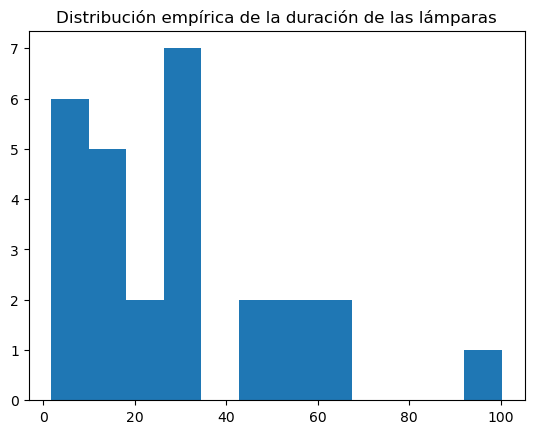

In [58]:
plt.hist(df_lamparas["duracion"], bins=12)
plt.title("Distribución empírica de la duración de las lámparas")

### c) Completar: Estos datos permiten estimar que el 90 % de las lámparas producidas por esta fábrica dura más de ........ horas y el 10 % dura menos de ........ horas.

In [59]:
quantile_10 = df_lamparas["duracion"].quantile(0.10)

print(f"Estos datos permiten estimar que el 90 % de las lámparas producidas por esta fábrica dura más de {quantile_10:.3f} horas y el 10 % dura menos de {quantile_10:.3f} horas.")

Estos datos permiten estimar que el 90 % de las lámparas producidas por esta fábrica dura más de 2.866 horas y el 10 % dura menos de 2.866 horas.


### Borrado de variables

In [60]:
del df_lamparas, quantile_10, proba_a

## Ejercicio 3

El archivo graduados.txt, contiene los promedios obtenidos en su carrera de grado de
30 inscriptos en el programa de postgrado del Departamento de Ingeniería Industrial
e Investigación Operativa de la Universidad de Berkeley, California.

### Carga de los datos

In [61]:
df_graduados = pd.read_csv(path+"/graduados.txt", header=None)

In [62]:
df_graduados.columns = ["promedio"]

In [63]:
df_graduados

,promedio
0,3.46
1,3.72
2,3.95
3,3.55
4,3.62
5,3.80
6,3.86
7,3.71
8,3.56
9,3.49


### a) Calcular la media muestral y la mediana muestral.

In [64]:
df_graduados["promedio"].mean()

3.720666666666667

In [65]:
df_graduados["promedio"].median()

3.72

### b) Calcular el desvío estándar muestral y la distancia intercuartil.

In [66]:
df_graduados["promedio"].std()

0.1456716509313239

In [67]:
IQR = df_graduados["promedio"].quantile(0.75) - df_graduados["promedio"].quantile(0.25)
IQR

0.20000000000000018

### c) Realizar un histograma con los datos y superponga la curva de una densidad normal con los parámetros que considere pertinentes.

c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='promedio', ylabel='Count'>

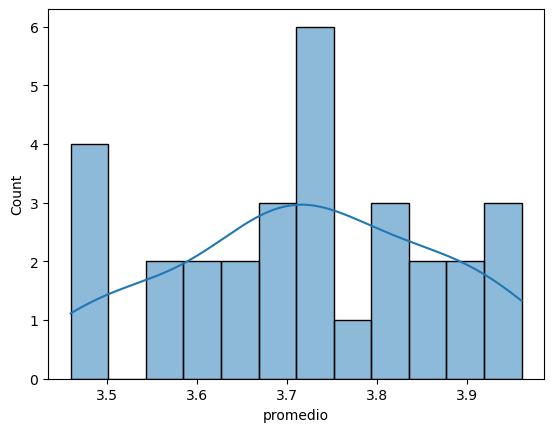

In [71]:
sns.histplot(df_graduados["promedio"], bins=12, kde=True)

### d) Realice un boxplot con este conjunto de datos. ¿Cu´ales son sus características más sobresalientes? ¿Cómo relaciona lo observado en los gráficos con los valores estimados de media y mediana obtenidos en a)? ¿Hay outliers?

<Axes: >

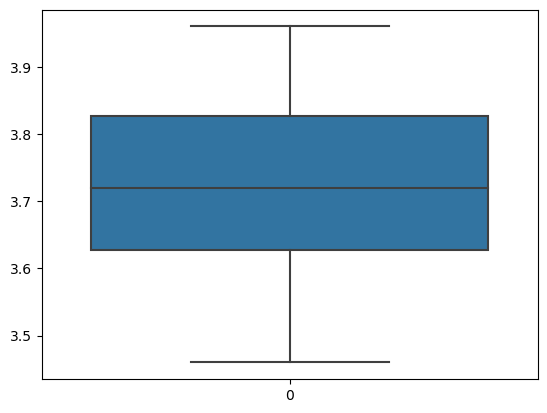

In [72]:
sns.boxplot(df_graduados["promedio"])

Es bastante simétrico, lo cual tiene sentido considerando que la media y la mediana coinciden. No tiene ningún outlier.

### e) ¿Qué distribución podría suponer que tienen estos datos?

Normal con parámetros $\mu$ = 3.72 y $\sigma$ = 0.14

### g) ¿Qué otro gráfico conoce que le permitiría verificar si su conjetura es razonable?

El QQ plot.

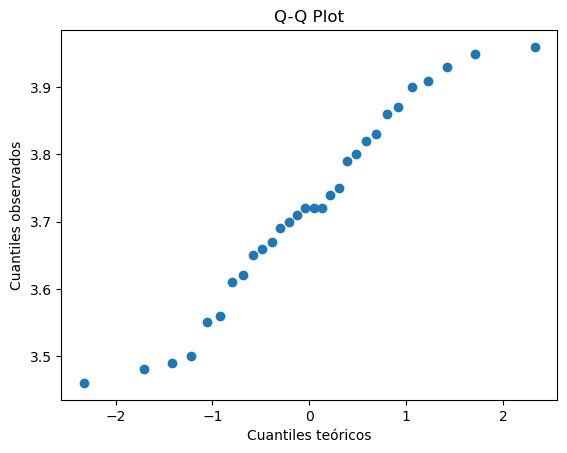

In [74]:
sorted_data = np.sort(df_graduados["promedio"])

teoricos = stats.norm.ppf(np.linspace(0.01, 0.99, len(df_graduados)))

plt.scatter(teoricos, sorted_data)
plt.title('Q-Q Plot')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.show()

### Borrado de variables

In [75]:
del df_graduados, IQR, sorted_data, teoricos

## Ejercicio 4

La siguiente tabla contiene valores de población, en cientos de miles, de las 10 ciudades
más pobladas de 4 países en el año 1967. Estos datos se encuentran en el archivo
ciudades.txt.

### Carga de los datos

In [82]:
df_ciudades = pd.read_csv(path+"/ciudades.txt", sep=" ", index_col=None)

In [83]:
df_ciudades

,Argentina,EEUU,Holanda,Japon
0,29.66,77.81,8.68,110.21
1,7.61,35.50,7.31,32.14
2,6.35,24.79,6.02,18.88
3,4.10,20.02,2.64,16.38
4,3.80,16.70,1.75,13.37
5,2.75,9.39,1.72,11.92
6,2.70,9.38,1.51,10.71
7,2.69,8.76,1.42,7.80
8,2.51,7.63,1.31,7.70
9,2.44,7.50,1.29,7.00


### a) Construir en paralelo, para facilitar la comparación, un boxplot para los datos de cada país e identificar los puntos extremos en cada uno de ellos.

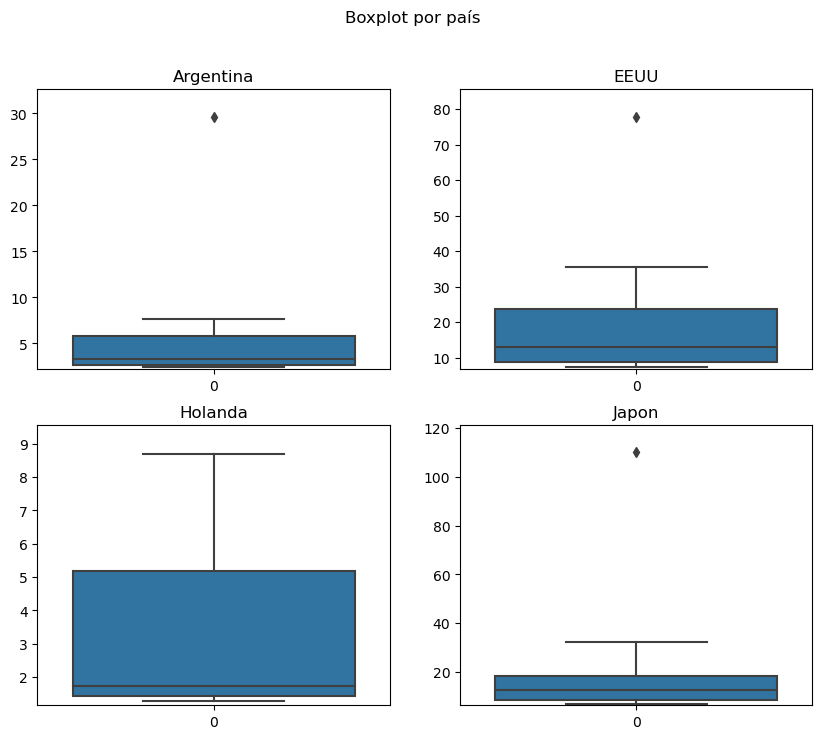

In [98]:
paises = df_ciudades.columns

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax = ax.flatten()

for i, pais in enumerate(paises):
    sns.boxplot(df_ciudades[pais], ax=ax[i])

    ylim = (df_ciudades[pais].min()*0.90, df_ciudades[pais].max()*1.10)

    ax[i].set_title(pais)
    ax[i].set_ylim(ylim)

plt.suptitle("Boxplot por país")
plt.show()

### b) Comparar los centros de cada población, sus dispersiones y su simetría. ¿Cuál diría que es el país más homogéneamente habitado?

A priori parecería que Holanda podría serlo, pero es porque los demás países cuentan con fuertes outliers. Conviene removerlos.

In [99]:
def remove_outliers(data, iqr_multiplier=1.5):

    # Calcular el rango intercuartílico (IQR)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    # Calcular los límites inferior y superior para identificar outliers
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr

    cleaned_data = data[(data >= lower_bound) & (data <= upper_bound)]

    return cleaned_data

In [117]:
paises_limpios = df_ciudades.copy()

for pais in df_ciudades.columns:
    paises_limpios[pais] = remove_outliers(df_ciudades[pais])

In [118]:
paises_limpios

,Argentina,EEUU,Holanda,Japon
0,NaN,NaN,8.68,NaN
1,7.61,35.50,7.31,32.14
2,6.35,24.79,6.02,18.88
3,4.10,20.02,2.64,16.38
4,3.80,16.70,1.75,13.37
5,2.75,9.39,1.72,11.92
6,2.70,9.38,1.51,10.71
7,2.69,8.76,1.42,7.80
8,2.51,7.63,1.31,7.70
9,2.44,7.50,1.29,7.00


In [121]:
paises_limpios["Argentina"].dropna().reset_index().drop("index", axis=1)

,Argentina
0,7.61
1,6.35
2,4.10
3,3.80
4,2.75
5,2.70
6,2.69
7,2.51
8,2.44


In [110]:
df_ciudades["Argentina"]

0    29.66
1     7.61
2     6.35
3     4.10
4     3.80
5     2.75
6     2.70
7     2.69
8     2.51
9     2.44
Name: Argentina, dtype: float64

c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

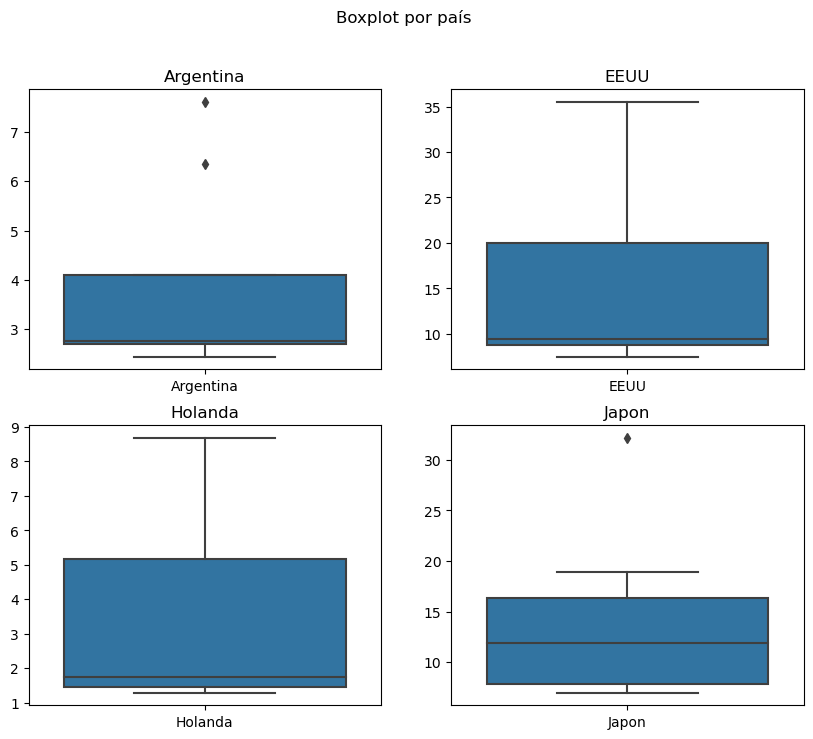

In [125]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax = ax.flatten()

for i, pais in enumerate(paises):

    cleaned_pais = paises_limpios[pais].dropna().reset_index().drop("index", axis=1)

    sns.boxplot(cleaned_pais, ax=ax[i])

    ylim = (cleaned_pais.min()*0.90, cleaned_pais.max()*1.10)

    ax[i].set_title(pais)

plt.suptitle("Boxplot por país")
plt.show()

Viendo estos nuevos boxplots, se observa fácilmente que el mejor distribuido es el de Japón, pues es el más simétrico de todos, a pesar de tener un outlier con altos valores. El resto se ve que tienden a valores muy bajos. El rango que va desde 0 hasta la mediana es muy estrecho, pero aún así se ve que se alcanzan valores muchísimo mayores que los que encierra éste, dando como resultado una caja con un rango de 0.50 a 0.75 muy amplio.

### Borrado de variables

In [126]:
del df_ciudades, cleaned_pais, paises_limpios, fig, ax

## Ejercicio 5

El archivo ingresos.txt contiene el ingreso mensual de un conjunto de 1000 trabajadores registrados de una ciudad, en miles de pesos.

### Carga de los datos

In [128]:
df_ingresos = pd.read_csv(path+"/ingresos.txt", header=None)

In [130]:
df_ingresos.columns = ["Ingresos"]

In [131]:
df_ingresos

,Ingresos
0,15.00000
1,15.00000
2,15.00000
3,15.00000
4,15.00000
...,...
995,26.89718
996,75.85065
997,15.00000
998,24.45400


### a) ¿Cuál es el ingreso mínimo percibido por los trabajadores encuestados? Estimar la proporción de los trabajadores de la ciudad que percibe el ingreso mínimo.

In [132]:
ingreso_minimo = df_ingresos["Ingresos"].min()

print(f"El ingreso mínimo es de: {ingreso_minimo:.2f} mil pesos")

El ingreso mínimo es de: 15.00 mil pesos


In [133]:
proporcion_ingreso_minimo = len(df_ingresos[df_ingresos["Ingresos"] == ingreso_minimo]) / len(df_ingresos)

print(f"Aproximadamente el {proporcion_ingreso_minimo*100:.2f} % de los trabajadores perciben el ingreso mínimo")

Aproximadamente el 46.10 % de los trabajadores perciben el ingreso mínimo


### b) Estimar el ingreso mensual que se necesita para pertenecer al 10 % de trabajadores de la ciudad con ingresos más altos.

In [135]:
quantile_90 = df_ingresos["Ingresos"].quantile(0.90)

print(f"Se necesitan más de {quantile_90:.2f} mil pesos para pertenecer al 10% que más gana")

Se necesitan más de 240.54 mil pesos para pertenecer al 10% que más gana


### c) Calcular la media muestral, la mediana muestral y la media α-podada con α = 0,10 (10 %).

In [138]:
print(f"La media muestral es de {df_ingresos['Ingresos'].mean():.2f} miles de pesos")

La media muestral es de 87.18 miles de pesos


In [144]:
print(f"La mediana muestral es de {df_ingresos['Ingresos'].median():.2f} miles de pesos")

La mediana muestral es de 18.47 miles de pesos


In [140]:
quantile_10 = df_ingresos["Ingresos"].quantile(0.10)

In [142]:
ingresos_podados = df_ingresos[(df_ingresos["Ingresos"] >= quantile_10) & (df_ingresos["Ingresos"] <= quantile_90)]

In [143]:
print(f"La media 0.10-podada es de {ingresos_podados['Ingresos'].mean():.2f} miles de pesos")

La media 0.10-podada es de 46.05 miles de pesos


### d) Calcular el desvío estándar muestral y la distancia intercuartil

In [145]:
print(f"El desvío estándar muestral es de {df_ingresos['Ingresos'].std():.2f} miles de pesos")

El desvío estándar muestral es de 152.03 miles de pesos


In [146]:
IQR = df_ingresos["Ingresos"].quantile(0.75) - df_ingresos["Ingresos"].quantile(0.25)

print(f"La distancia intercuartil es de {IQR:.2f} miles de pesos")

La distancia intercuartil es de 74.97 miles de pesos


### e) Realizar un histograma y un boxplot. ¿Cu´ales son las características más sobresalientes? ¿Hay outliers?

c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


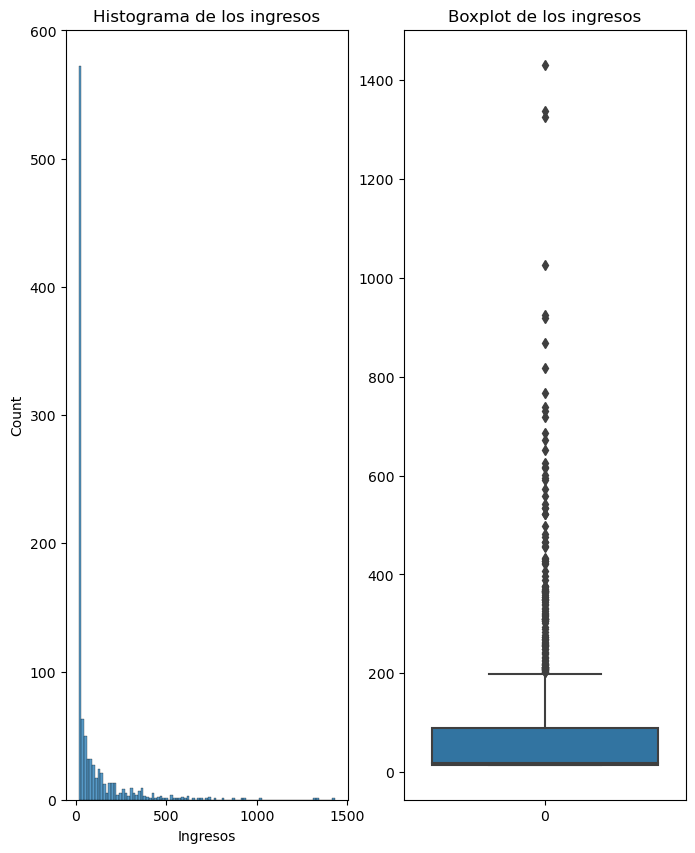

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(8, 10))

ax = ax.flatten()

sns.histplot(df_ingresos["Ingresos"], ax=ax[0])
ax[0].set_title("Histograma de los ingresos")
sns.boxplot(df_ingresos["Ingresos"], ax=ax[1])
ax[1].set_title("Boxplot de los ingresos")

plt.show()

El histograma parece indicar una clara distribución exponencial en los ingresos: la gran mayoría tiene valores bajos, y son cada vez menos aquellos que ganan muchos. Esto provoca una abrupta cantidad de outliers en el boxplot.

### f) ¿Cree que los datos podrían provenir de una población con distribución normal?

No, parece más exponencial.

### Borrado de variables

In [149]:
del df_ingresos, quantile_10, quantile_90, ingresos_podados, fig, ax 

## Ejercicio 6

Este ejercicio es para familiarizarse con el uso e interpretación de los QQ–plots.